<a href="https://colab.research.google.com/github/illusoryTwin/FoR/blob/main/assig3/FoRassig3_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Define the fundamental functions
### Transformation matrices

In [ ]:
import numpy as np

# Define rotation and translation functions
def rotate_z(theta):
    return np.array([[np.cos(theta), -np.sin(theta), 0, 0],
                     [np.sin(theta), np.cos(theta), 0, 0],
                     [0, 0, 1, 0],
                     [0, 0, 0, 1]])

def rotate_x(theta):
    return np.array([[1, 0, 0, 0],
                     [0, np.cos(theta), -np.sin(theta), 0],
                     [0, np.sin(theta), np.cos(theta), 0],
                     [0, 0, 0, 1]])

def rotate_y(theta):
    return np.array([[np.cos(theta), 0, np.sin(theta), 0],
                     [0, 1, 0, 0],
                     [-np.sin(theta), 0, np.cos(theta), 0],
                     [0, 0, 0, 1]])

def translate_x(d):
    return np.array([[1, 0, 0, d],
                     [0, 1, 0, 0],
                     [0, 0, 1, 0],
                     [0, 0, 0, 1]])

def translate_y(d):
    return np.array([[1, 0, 0, 0],
                     [0, 1, 0, d],
                     [0, 0, 1, 0],
                     [0, 0, 0, 1]])

def translate_z(d):
    return np.array([[1, 0, 0, 0],
                     [0, 1, 0, 0],
                     [0, 0, 1, d],
                     [0, 0, 0, 1]])

def validate_matrix(matrix):

    tolerance = 1e-12
    # Define a function to check if a value is close to zero within the tolerance
    def is_close_to_zero(value):
        return abs(value) < tolerance

    # Iterate through each element in the matrix
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            # If the element is close to zero, set it to zero
            if is_close_to_zero(matrix[i][j]):
                matrix[i][j] = 0



### Symbolic transformation matrices

In [ ]:
import sympy as sp

# Define symbolic rotation and translation functions
def rotate_z_sym(theta):
    return sp.Matrix([
        [sp.cos(theta), -sp.sin(theta), 0, 0],
        [sp.sin(theta), sp.cos(theta), 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])

def rotate_x_sym(theta):
    return sp.Matrix([
        [1, 0, 0, 0],
        [0, sp.cos(theta), -sp.sin(theta), 0],
        [0, sp.sin(theta), sp.cos(theta), 0],
        [0, 0, 0, 1]
    ])

def rotate_y_sym(theta):
    return sp.Matrix([
        [sp.cos(theta), 0, sp.sin(theta), 0],
        [0, 1, 0, 0],
        [-sp.sin(theta), 0, sp.cos(theta), 0],
        [0, 0, 0, 1]
    ])

def translate_x_sym(d):
    return sp.Matrix([
        [1, 0, 0, d],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])

def translate_y_sym(d):
    return sp.Matrix([
        [1, 0, 0, 0],
        [0, 1, 0, d],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])

def translate_z_sym(d):
    return sp.Matrix([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, d],
        [0, 0, 0, 1]
    ])

def validate_matrix_sym(matrix):
    tolerance = 1e-12
    # Define a function to check if a value is close to zero within the tolerance
    def is_close_to_zero(value):
        return abs(value) < tolerance

    # Iterate through each element in the matrix
    for i in range(matrix.rows):
        for j in range(matrix.cols):
            # If the element is close to zero, set it to zero
            if is_close_to_zero(matrix[i, j]):
                matrix[i, j] = 0


# Solving dynamics
### Define the Manipulator class

In [ ]:
import numpy as np

class Manipulator:
    def __init__(self, l, m=[1 for _ in range(6)], r=[0.05 for _ in range(6)]):
        self.l = l # length of the links
        self.m = m # mass of the links
        self.q = None # configuration parameters (angles)
        self.prev_q = None # the previous configuration state
        self.r = r # radii of cylindrical links
        self.h = l  # heights of cylindrical links
        self.lc = [l_i / 2 for l_i in l]  # distances to the links' CoMs

    def set_config(self, q_):
        if self.q is None:
            self.q = q_ if isinstance(q_, list) else [q_]
        else:
            self.prev_q = self.q
            self.q.extend(q_ if isinstance(q_, list) else [q_])

    def get_config(self):
        return self.q

    def get_config_in_pi(self):
        return [str(q_ / np.pi) + "pi" for q_ in self.q]

    def set_prev_config(self, prev_q_):
        if self.prev_q is None:
            self.prev_q = prev_q_ if isinstance(prev_q_, list) else [prev_q_]
        else:
            raise ValueError("Previous configuration is already set. Cannot set again.")

    def get_prev_config(self):
        if self.prev_q is None:
            raise ValueError("Previous configuration is not set.")
        else:
            return self.prev_q

    def get_delta_q(self):
        if self.q is None or self.prev_q is None:
            raise ValueError("Error! Set a proper configuration")
        else:
            delta_q = [q_ - q_prev_ for (q_, q_prev_) in zip(self.q, self.prev_q)]
            return delta_q

    def get_delta_q_in_pi(self):
        if self.q is None or self.prev_q is None:
            raise ValueError("Error! Set a proper configuration")
        else:
            delta_q_pi = [(q_ - q_prev_) / np.pi for (q_, q_prev_) in zip(self.q, self.prev_q)]
            return delta_q_pi

    def get_prev_config_in_pi(self):
        if self.prev_q is None:
            raise ValueError("Previous configuration is not set.")
        else:
            return [q_prev_ / np.pi for q_prev_ in self.prev_q]

In [ ]:
# Example of usage
l = [1 for _ in range(6)]
m = [1 for _ in range(6)]
q = [np.pi/2, np.pi/3, np.pi/4, 0, np.pi/12, 0]
q_prev = [np.pi/2, np.pi/6, np.pi/4, np.pi/12, np.pi/12, 0]

manipulator = Manipulator(l, m)
manipulator.set_config(q)
manipulator.set_prev_config(q_prev)

print(manipulator.get_config())
print(manipulator.get_prev_config())
print("delta q: ", manipulator.get_delta_q_in_pi())

[1.5707963267948966, 1.0471975511965976, 0.7853981633974483, 0, 0.2617993877991494, 0]
[1.5707963267948966, 0.5235987755982988, 0.7853981633974483, 0.2617993877991494, 0.2617993877991494, 0]
delta q:  [0.0, 0.16666666666666666, 0.0, -0.08333333333333333, 0.0, 0.0]


### Find center of mass

In [ ]:
from sympy import symbols

def calculate_com_symb(manipulator: Manipulator):
    theta1, theta2, theta3, theta4, theta5, theta6 = symbols('theta1 theta2 theta3 theta4 theta5 theta6')
    lc1, lc2, lc3, lc4, lc5, lc6 = manipulator.lc
    l1, l2, l3, l4, l5, l6 = manipulator.l

    T_0 = np.identity(4)
    T_01 = rotate_z_sym(theta1) @ translate_z(l1) @ rotate_z(np.pi/2) @ rotate_x(np.pi/2)
    T_12 = rotate_z_sym(theta2) @ translate_x(l2)
    T_23 = rotate_z_sym(theta3) @ translate_x(l3) @ rotate_y(np.pi/2) @ rotate_z(np.pi/2)
    T_34 = rotate_z_sym(theta4) @ translate_z(l4) @ rotate_x(-np.pi/2) @ rotate_z(-np.pi)
    T_45 = rotate_z_sym(theta5) @ translate_y(l5) @ rotate_x(-np.pi/2)
    T_56 = rotate_z_sym(theta6) @ translate_z(l6)


    com1 = T_0 @ rotate_z_sym(theta1) @ translate_z(lc1) @ rotate_z(np.pi/2) @ rotate_x(np.pi/2)

    T_01 = T_0 @ T_01
    com2 = T_01 @ rotate_z_sym(theta2) @ translate_x(lc2)

    T_02 = T_01 @ T_12
    com3 = T_02 @ rotate_z_sym(theta3) @ translate_x(lc3) @ rotate_y(np.pi/2) @ rotate_z(np.pi/2)

    T_03 = T_02 @ T_23
    com4 = T_03 @ rotate_z_sym(theta4) @ translate_z(lc4) @ rotate_x(-np.pi/2) @ rotate_z(-np.pi)

    T_04 = T_03 @ T_34
    com5 = T_04 @ rotate_z_sym(theta5) @ translate_y(lc5) @ rotate_x(-np.pi/2)

    T_05 = T_04 @ T_45
    com6 = T_05 @ rotate_z_sym(theta6) @ translate_z(lc6)

    coms = [com1, com2, com3, com4, com5, com6]
    return coms


coms_matrices_symb = calculate_com_symb(manipulator)
# coms_matrices_symb #  too long to print

### Calculate inertia/mass matrices assuming that the manipulator's links are cylindrical

In [ ]:
class InertiaMatrixForCylinder:
    def __init__(self, m, r, h):
        self.m = m
        self.r = r
        self.h = h

    def compute(self):
        I = np.array([[self.m*self.h**2/12 + self.m*self.r**2/4, 0, 0],
                      [0, self.m*self.h**2/12 + self.m*self.r**2/4, 0],
                      [0, 0, self.m*self.r**2/4]])
        return I


### Calculate the Jacobian J_v




In [ ]:
def calculate_jacobian_v(com_symb):

  q1_symb, q2_symb, q3_symb, q4_symb, q5_symb, q6_symb = sp.symbols('theta1 theta2 theta3 theta4 theta5 theta6')
  q_symb = [q1_symb, q2_symb, q3_symb, q4_symb, q5_symb, q6_symb]

  Jv = np.zeros((6,3,6), object)
  for n in range(6):
    for i in range(3):
      for j in range(6):
        Jv[n][i, j] = sp.diff(com_symb[n][i, 3], q_symb[j])

  return sp.Array(Jv)


Jv = calculate_jacobian_v(coms_matrices_symb)
Jv

[[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0.5*(-6.12323399573677e-17*sin(theta1) - 1.0*cos(theta1))*cos(theta2) + 0.5*(6.12323399573677e-17*sin(theta1) - 3.74939945665464e-33*cos(theta1))*sin(theta2), -0.5*(-1.0*sin(theta1) + 6.12323399573677e-17*cos(theta1))*sin(theta2) + 0.5*(-3.74939945665464e-33*sin(theta1) - 6.12323399573677e-17*cos(theta1))*cos(theta2), 0, 0, 0, 0], [0.5*(-1.0*sin(theta1) + 6.12323399573677e-17*cos(theta1))*cos(theta2) + 0.5*(-3.74939945665464e-33*sin(theta1) - 6.12323399573677e-17*cos(theta1))*sin(theta2), 0.5*(-6.12323399573677e-17*sin(theta1) + 3.74939945665464e-33*cos(theta1))*cos(theta2) - 0.5*(6.12323399573677e-17*sin(theta1) + 1.0*cos(theta1))*sin(theta2), 0, 0, 0, 0], [0, 0.5*cos(theta2), 0, 0, 0, 0]], [[0.5*(-(-6.12323399573677e-17*sin(theta1) - 1.0*cos(theta1))*sin(theta2) + (6.12323399573677e-17*sin(theta1) - 3.74939945665464e-33*cos(theta1))*cos(theta2))*sin(theta3) + 0.5*((-6.12323399573677e-17*sin(theta1) - 1.0*cos(theta1))*co

### Calculate the Jacobian J_w




In [ ]:
def calculate_jacobian_w(com_symb):
    jacobian_w = np.zeros((6, 3, 6), object)
    u = [np.array([[0], [0], [1]]),  com_symb[0][:3, 2],  com_symb[1][:3, 2], com_symb[2][:3, 2],  com_symb[3][:3, 2],  com_symb[4][:3, 2]]
    for i in range(6):
      for j in range(i+1):
        nt = np.array(u[j].tolist())
        jacobian_w[i][:, j] = np.transpose(nt)[0] #u[j].tolist()[:]
    return sp.Array(jacobian_w)

Jw = calculate_jacobian_w(coms_matrices_symb)
Jw

[[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0]], [[0, 6.12323399573677e-17*sin(theta1) + 1.0*cos(theta1), 0, 0, 0, 0], [0, 1.0*sin(theta1) - 6.12323399573677e-17*cos(theta1), 0, 0, 0, 0], [1, 6.12323399573677e-17, 0, 0, 0, 0]], [[0, 6.12323399573677e-17*sin(theta1) + 1.0*cos(theta1), 6.12323399573677e-17*sin(theta1) + 1.0*cos(theta1), 0, 0, 0], [0, 1.0*sin(theta1) - 6.12323399573677e-17*cos(theta1), 1.0*sin(theta1) - 6.12323399573677e-17*cos(theta1), 0, 0, 0], [1, 6.12323399573677e-17, 6.12323399573677e-17, 0, 0, 0]], [[0, 6.12323399573677e-17*sin(theta1) + 1.0*cos(theta1), 6.12323399573677e-17*sin(theta1) + 1.0*cos(theta1), 1.0*(-(-1.0*sin(theta1) + 6.12323399573677e-17*cos(theta1))*sin(theta2) + (-3.74939945665464e-33*sin(theta1) - 6.12323399573677e-17*cos(theta1))*cos(theta2))*sin(theta3) + 1.0*((-1.0*sin(theta1) + 6.12323399573677e-17*cos(theta1))*cos(theta2) + (-3.74939945665464e-33*sin(theta1) - 6.12323399573677e-17*cos(theta1))*sin(theta2))*cos(theta3) + 3.74939945

In [ ]:
def define_R(com_symb):
    R = np.zeros((6, 3, 3), object)
    for n in range(6):
        R[n] = com_symb[n][:3, :3]
    return R

R = define_R(coms_matrices_symb)

# Calculate Mass (Inertia) Matrix

In [ ]:
class MassMatrix:
  def __init__(self, manipulator, com_symb):
    self.manipulator = manipulator
    self.com_symb = com_symb

  def compute_symb(self):
    M = np.zeros((6, 6), object)
    for i in range(6):
      m_i = manipulator.m[i]
      Jv = calculate_jacobian_v(self.com_symb)[i]
      Jw = calculate_jacobian_w(self.com_symb)[i]
      R = define_R(self.com_symb)[i]
      I_m = InertiaMatrixForCylinder(m_i, manipulator.r[i], manipulator.h[i])
      I = I_m.compute()

      M += m_i * np.transpose(Jv) @ Jv + np.transpose(Jw) @ R @ I @ np.transpose(R) @ Jw
    return M

mass_matrix = MassMatrix(manipulator, coms_matrices_symb).compute_symb()


## Calculate Coriolis matrix

In [ ]:
class CorMatrix:

  def __init__(self, mass_matrix):
    self.manipulator = manipulator
    self.M = mass_matrix

  def compute_symb(self):
    dq = sp.symbols('dtheta1 dtheta2 dtheta3 dtheta4 dtheta5 dtheta6')
    q = sp.symbols('theta1 theta2 theta3 theta4 theta5 theta6')

    C = np.zeros((6, 6), object)
    for i in range(6):
      for j in range(6):
        for k in range(6):
          c_ijk = 0.5 * (sp.diff(self.M[i,j], q[k]) + sp.diff(self.M[i,k], q[j]) - sp.diff(self.M[j,k], q[i]))
          C[i, j] += c_ijk * dq[k]
    return C

cor_matrix = CorMatrix(mass_matrix).compute_symb()


# Calculate gravity matrix

In [ ]:
class GravityMatrix:
  def __init__(self, jacobian_v):
    self.jacobian_v = jacobian_v
    self.G_CONST = 9.81

  def compute_symb(self):
    G = np.zeros(6, object)
    Jv = self.jacobian_v

    for i in range(6):
      for k in range(6):
        G[i] -= np.dot(Jv[k, :, i], m[k] * np.array([0, 0, self.G_CONST]))

    return sp.Array(G)

grav_matrix = GravityMatrix(Jv).compute_symb()

# **Solve numerically**

In [ ]:
class DynamicsNumericalSolver:
    def __init__(self, q, dq):
        self.q = q
        self.dq = dq
        self.q_sym = sp.symbols('theta1 theta2 theta3 theta4 theta5 theta6')
        self.dq_sym = sp.symbols('dtheta1 dtheta2 dtheta3 dtheta4 dtheta5 dtheta6')

    def subs_symbols(self, expr, symbols, values):
        return expr.subs(list(zip(symbols, values)))

    def calc_M_num(self, M):
        M_num = np.zeros((6, 6))
        for i in range(6):
            for j in range(6):
                M_num[i, j] = self.subs_symbols(M[i, j], self.q_sym, self.q).evalf()
        return M_num

    def calc_C_num(self, C):
        C_num = np.zeros((6, 6))
        for i in range(6):
            for j in range(6):
                C_num[i, j] = self.subs_symbols(C[i, j], self.q_sym + self.dq_sym, self.q + self.dq).evalf()
        return C_num

    def calc_G_num(self, G):
        G_num = np.zeros(6)
        for i in range(6):
            G_num[i] = self.subs_symbols(G[i], self.q_sym, self.q).evalf()
        return G_num

q = [np.pi/2, -np.pi/12, -np.pi/12, np.pi/4, np.pi/6, 0]
dq = [np.pi/24, -np.pi/24, -np.pi/24, np.pi/24, np.pi/24, -np.pi/24]
sol = DynamicsNumericalSolver(q, dq)

mm = sol.calc_M_num(mass_matrix)
cm = sol.calc_C_num(cor_matrix)
gm = sol.calc_G_num(grav_matrix)

mm

array([[ 3.47889606e+01,  1.04577703e+00,  8.62764329e-01,
        -2.99080185e+00, -4.93809167e+00, -7.92665525e-05],
       [ 1.04577703e+00,  3.94428621e+01,  2.75406368e+01,
        -2.91372285e+00,  5.77782346e+00,  2.20970869e-04],
       [ 8.62764329e-01,  2.75406368e+01,  1.98890366e+01,
        -2.23071014e+00,  4.33599171e+00,  2.20970869e-04],
       [-2.99080185e+00, -2.91372285e+00, -2.23071014e+00,
         7.51875000e-01,  8.67361738e-17,  5.41265877e-04],
       [-4.93809167e+00,  5.77782346e+00,  4.33599171e+00,
         7.70899661e-17,  2.66791667e+00,  6.12329750e-18],
       [-7.92665525e-05,  2.20970869e-04,  2.20970869e-04,
         5.41265877e-04,  7.03376159e-18,  6.25000000e-04]])

# **Trajectory planning**

In [ ]:
import matplotlib.pyplot as plt


class TrajectoryTypeChecker:
    """
    The wrapper-class for determining the type of trajectory (triangular or
    trapezoidal based on the given joint parameters.
    """
    def __init__(self):
        pass

    def check_traj_type(self, q_params, t0=0):
        q0, qf, dq_max, ddq_max = q_params
        delta_q = qf - q0

        if np.sqrt(delta_q*ddq_max) <= dq_max:
            return "Triangular"
        else:
            return "Trapezoidal"


class TrajectoryTimeCalculator:
    """
    The wrapper-class for calculating time parameters (tau, T, tf)
    for different types of trajectories.
    """
    def __init__(self):
        self.checker = TrajectoryTypeChecker()

    def calc_traj_time(self, q_params, t0=0):
        q0, qf, dq_max, ddq_max = q_params
        delta_q = qf - q0

        if self.checker.check_traj_type(q_params) == "Triangular":
            tau = delta_q / dq_max
            T = tau
            tf = 2 * tau
        else:
            T = delta_q / dq_max
            tau = dq_max / ddq_max
            tf = T + tau

        return 0, tau, T, tf

class TimeSynchronizer:
    def __init__(self):
        pass

    def sync_time(self, t_params_list):
        t0_sync, t_total, t_dwel = 0, 0, 0

        for t_params in t_params_list:
            t0, tau, T, tf = t_params
            t0_sync = max(t0_sync, t0)
            t_total = max(t_total, tf - t0)
            t_dwel = max(t_dwel, T - tau)

        t0_sync, tf_sync = t0_sync, t0_sync + t_total
        tau_sync = t0 + (t_total - t_dwel) / 2
        T_sync = tau_sync + t_dwel

        return t0_sync, tau_sync, T_sync, tf_sync


class TrapezoidalTrajectoryPlanner:
    def __init__(self):
        pass

    def plan_trajectory(self, t_params, q_params):
        q0, qf, dq_max, ddq_max = q_params
        t0, tau, T, tf = t_params
        t = np.linspace(t0, tf, int(3e3))

        dq_max = min(dq_max, (qf - q0) / T)
        q, dq, ddq = [], [], []
        dq_i, ddq_i = 0, 0
        # q_03, dq03 = 0, 0

        for i in t:
            t_i = i
            q_i = q0

            if 0 < t_i <= tau:

                q_i = q0 + 1/2*ddq_max*(t_i-t0)**2
                q02 = q_i
                dq_i = min(ddq_max * t_i, dq_max)
                dq02 = dq_i
                ddq_i = ddq_max

            elif tau < t_i and t_i <= T:
            # elif tau < t_i and t_i <= (tf - tau):

                q_i = q02 + dq02*(t_i-tau)
                q_03 = q_i
                dq_i = dq_max
                dq03 = dq_i
                ddq_i = 0


            elif t_i > T:
            # elif t_i > (tf - tau):

                q_i = q_03 + dq03*(t_i-T) - 1/2*ddq_max*(t_i-T)**2
                dq_i = min(ddq_max*(tf-t_i), dq_max)
                ddq_i = -ddq_max

            q.append(q_i)
            dq.append(dq_i)
            ddq.append(ddq_i)

        return t, q, dq, ddq


In [ ]:
def plan_sync_trajectory(q_params_list):
    '''
    The main function to create a synchronized trajectory
    '''
    calc_traj = TrajectoryTimeCalculator()
    time_params = [calc_traj.calc_traj_time(j) for j in q_params_list]

    def time_synchronize(t_params):
      synchronizer = TimeSynchronizer()
      t_params_sync = synchronizer.sync_time(t_params)
      return t_params_sync

    t_params_sync = time_synchronize(time_params)

    sync_traj_joints = []
    planner = TrapezoidalTrajectoryPlanner()
    for q_params in q_params_list:
      # print("q_params", q_params)
      sync_traj = planner.plan_trajectory(t_params_sync, q_params)
      sync_traj_joints.append(sync_traj)

    return sync_traj_joints


def plot_trajectory(solution):
    for i in range(len(solution)):
        t, q, dq, ddq = solution[i]

        # Create a new figure for each solution
        plt.figure(figsize=(6, 8))

        # Plot joint positions
        plt.subplot(311)
        plt.plot(t, q)
        plt.title(f"Joint Positions for Solution {i+1}")
        plt.xlabel("Time")
        plt.ylabel("Position")
        plt.grid(True)

        # Plot joint velocities
        plt.subplot(312)
        plt.plot(t, dq)
        plt.title(f"Joint Velocities for Solution {i+1}")
        plt.xlabel("Time")
        plt.ylabel("Velocity")
        plt.grid(True)

        # Plot joint accelerations
        plt.subplot(313)
        plt.plot(t, ddq)
        plt.title(f"Joint Accelerations for Solution {i+1}")
        plt.xlabel("Time")
        plt.ylabel("Acceleration")
        plt.grid(True)

        # Show the plots
        plt.tight_layout()
        plt.show()


Let's set the parameters in the form: $[q_0, q_f, \dot q_m, \ddot q_m]$.

And let's check whether they satisfy the trapezoidal trajectories.


In [ ]:
j1 = [0, np.pi/3,     1,   4]
j2 = [0, np.pi/12,    1,   4]
j3 = [0, np.pi/6,   1.5, 4.5]
j4 = [0, np.pi/8,     1, 3.5]
j5 = [0, np.pi/6,   1.5,   5]
j6 = [0, np.pi/3,     2,   4]

# j1 = [0, np.pi/3, 8, 4]
# j2 = [0, np.pi/12, 4, 2]
# j3 = [0, np.pi/6, 4, 2]
# j4 = [0, np.pi/8, 4, 2]
# j5 = [0, np.pi/6, 3, 2]
# j6 = [0, np.pi/3, 5, 2]

j_s = [j1, j2, j3, j4, j5, j6]

for j in j_s:
  print(TrajectoryTypeChecker().check_traj_type(j))

Trapezoidal
Trapezoidal
Trapezoidal
Trapezoidal
Trapezoidal
Trapezoidal


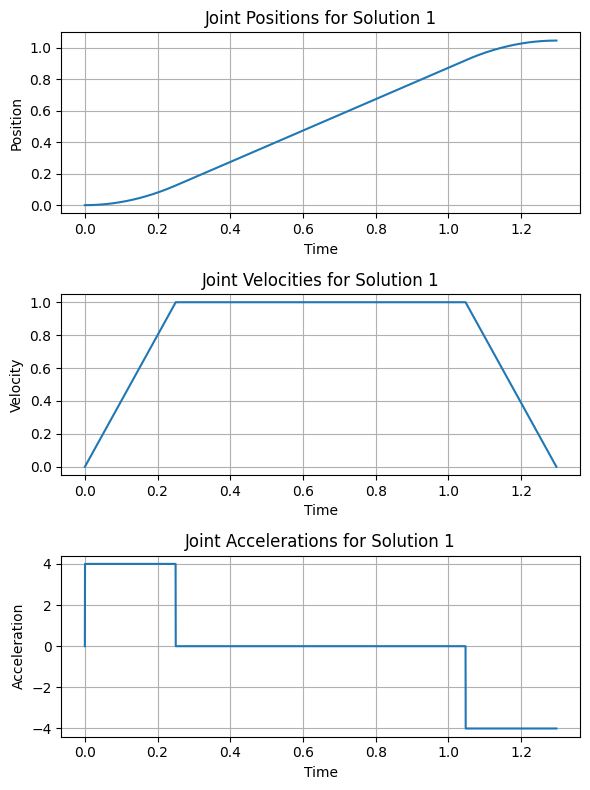

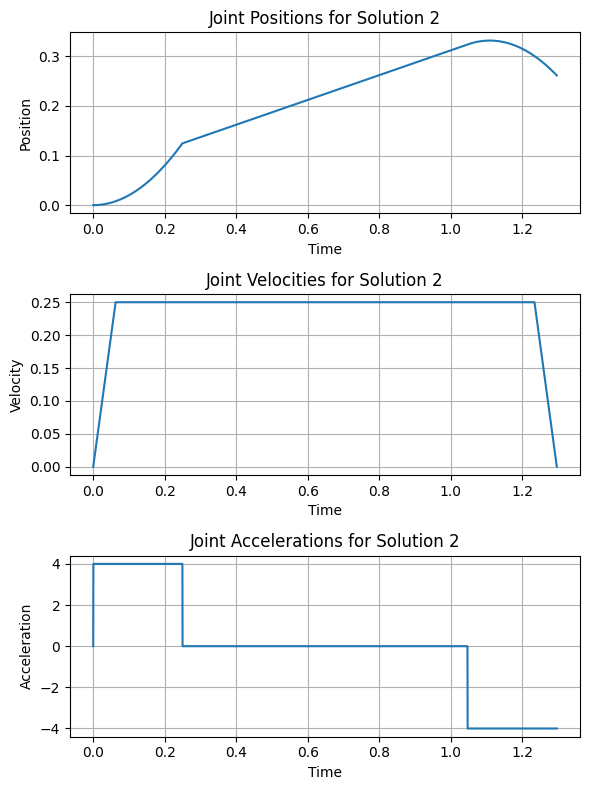

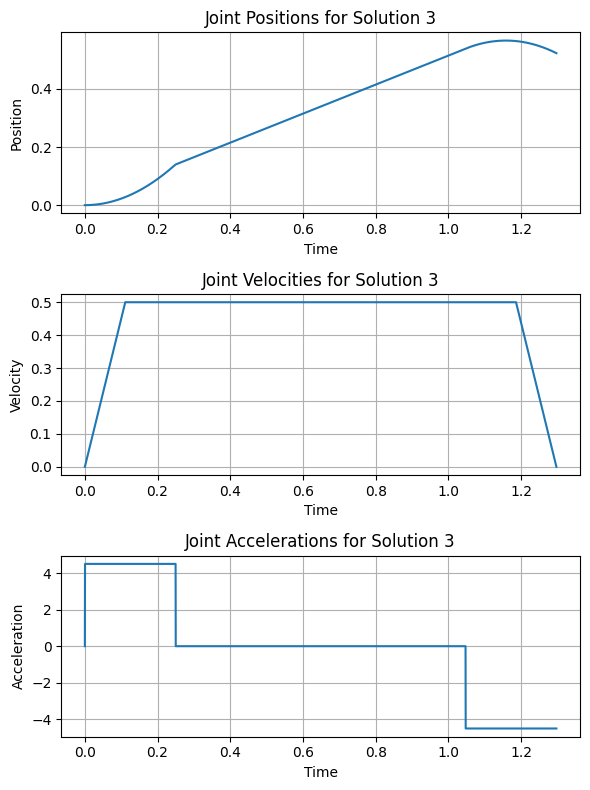

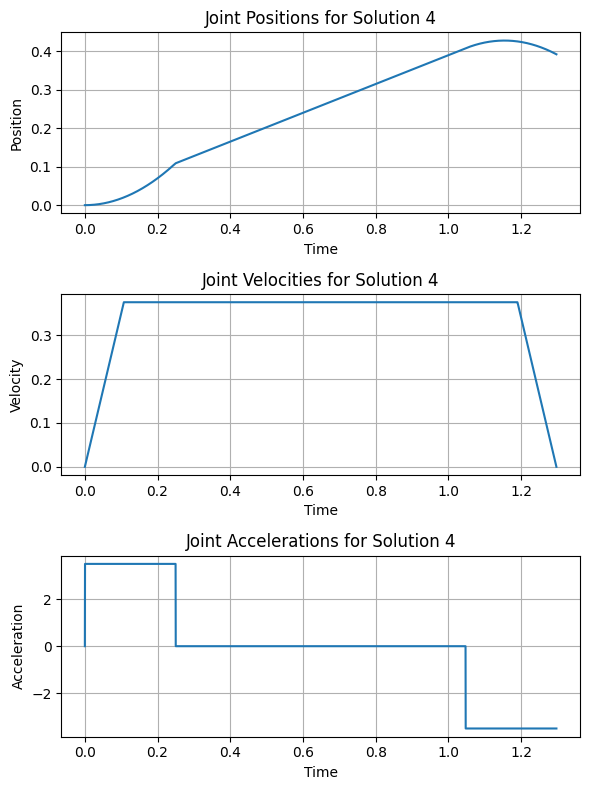

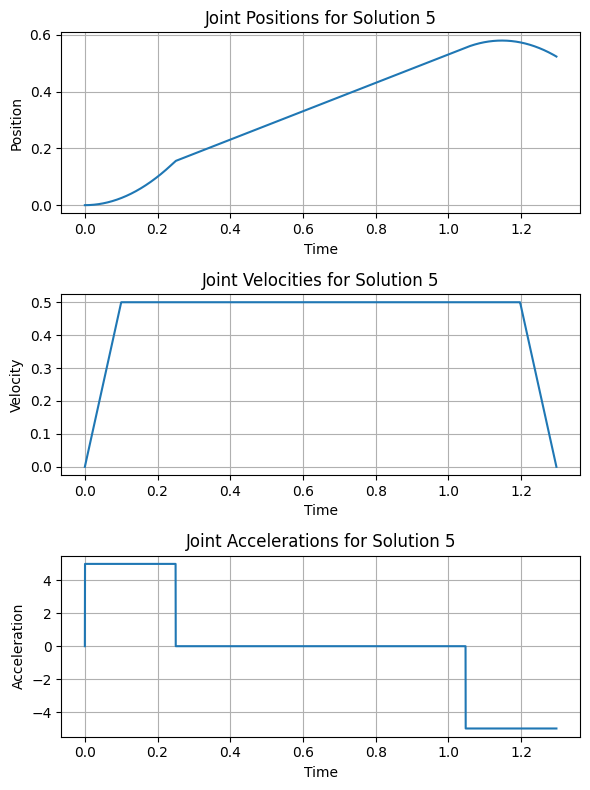

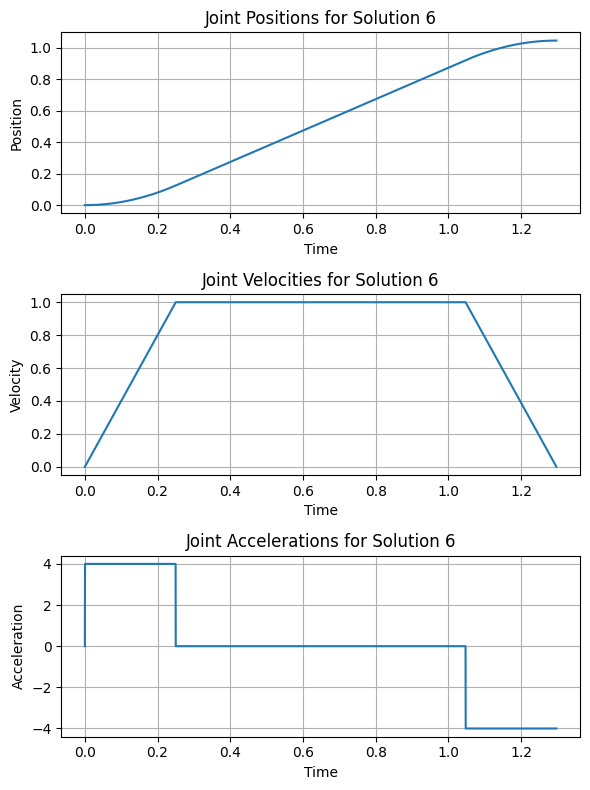

In [ ]:
# Example usage

# Define the params [q0, qf, dq_m, ddq_m]
# j1 = [0, np.pi/3, 8, 4]
# j2 = [0, np.pi/12, 4, 2]
# j3 = [0, np.pi/6, 4, 2]
# j4 = [0, np.pi/8, 4, 2]
# j5 = [0, np.pi/6, 3, 2]
# j6 = [0, np.pi/3, 5, 2]

# j1 = [0,90,8,4]
# j2 = [0,60,4,2]
# j3 = [0,62,4,2]
# j4 = [0,60,4,2]
# j5 = [0,60,3,2]
# j6 = [0,60,5,2]

j1 = [0, np.pi/3,     1,   4]
j2 = [0, np.pi/12,    1,   4]
j3 = [0, np.pi/6,   1.5, 4.5]
j4 = [0, np.pi/8,     1, 3.5]
j5 = [0, np.pi/6,   1.5,   5]
j6 = [0, np.pi/3,     2,   4]

# j1 = [0, 3,   1,   4]
# j2 = [0, 1,   1.5, 3]
# j3 = [0, 2,   2,   4]
# j4 = [0, 2.5, 1.5, 2]
# j5 = [0, 1,   1.5, 3]
# j6 = [0, 2.5, 2,   4]

j_list = [j1, j2, j3, j4, j5, j6]

solution = plan_sync_trajectory(j_list)
plot_trajectory(solution)

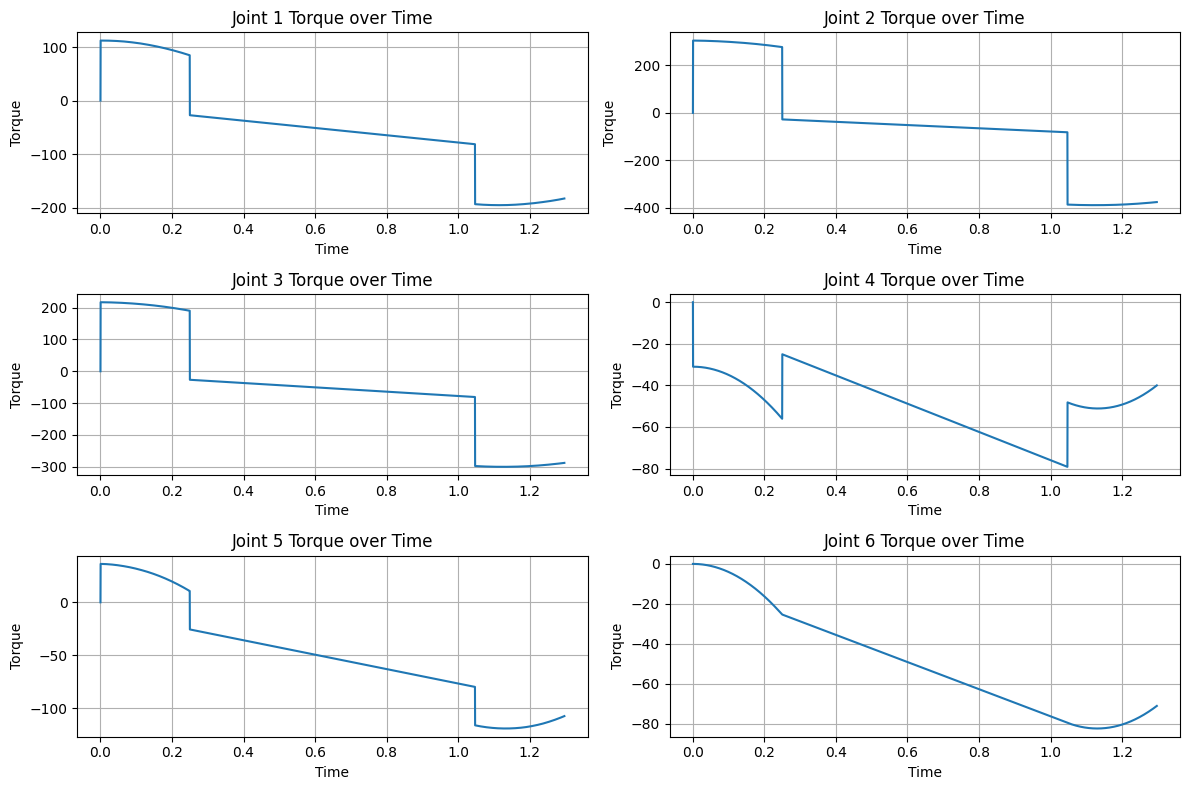

In [ ]:
import matplotlib.pyplot as plt

q_s, dq_s, ddq_s = [], [], []

for i in range(len(solution)):
  t, q, dq, ddq = solution[i]
  q_s.append(q)
  dq_s.append(dq)
  ddq_s.append(ddq)

# def plot_dynamics(dq, ddq, M):
#   for i in range(3000):


m_ddq = mm @ ddq_s
c_dq = cm @ dq_s
g_q = gm @ q_s
tau = m_ddq + c_dq + g_q

# Plotting joint torques
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(3, 2, i+1)
    plt.plot(t, tau[i])
    plt.title(f'Joint {i+1} Torque over Time')
    plt.xlabel('Time')
    plt.ylabel('Torque')
    plt.grid(True)

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

# **Some tests**

# Traj planning v2.0

In [ ]:
class TrajectoryTypeChecker:
    def __init__(self):
        pass

    def check_traj_type(self, q_params, t0=0):
        q0, qf, dq_max, ddq_max = q_params
        delta_q = qf - q0

        if np.sqrt(delta_q*ddq_max) <= dq_max:
            return "Triangular"
        else:
            return "Trapezoidal"

class TrajectoryTimeCalculator:
    def __init__(self):
        self.checker = TrajectoryTypeChecker()

    def calc_traj_time(self, q_params, t0=0):
        q0, qf, dq_max, ddq_max = q_params
        delta_q = qf - q0

        if self.checker.check_traj_type(q_params) == "Triangular":
            tau = delta_q / dq_max
            T = tau
            tf = 2 * tau
        else:
            T = delta_q / dq_max
            tau = dq_max / ddq_max
            tf = T + tau

        return 0, tau, T, tf

# # Example usage:
# calc_traj = TrajectoryTimeCalculator()
# params1 = [10, 45, 8, 4]
# # traj_type = calc_traj.checker.check_traj_type(params1)  # Check trajectory type

# _,t1,T,tf  = calc_traj.calc_traj_time(params1)
# print( 'rise time: {}, dwel time: {}, drop time: {}, total time: {}'.format(t1, T-t1, tf-T, tf))

In [ ]:
class TimeSynchronizer:
    def __init__(self):
        pass

    def sync_time(self, t_params_list):
        t0_sync, t_total, t_dwel = 0, 0, 0

        for t_params in t_params_list:
            t0, tau, T, tf = t_params
            t0_sync = max(t0_sync, t0)
            t_total = max(t_total, tf - t0)
            t_dwel = max(t_dwel, T - tau)

        t0_sync, tf_sync = t0_sync, t0_sync + t_total
        tau_sync = t0 + (t_total - t_dwel) / 2
        T_sync = tau_sync + t_dwel

        return t0_sync, tau_sync, T_sync, tf_sync

# # Example usage
# j1 = [0,90,8,4]
# j2 = [0,60,4,2]
# j3 = [0,62,4,2]
# j4 = [0,60,4,2]
# j5 = [0,60,3,2]
# j6 = [0,60,5,2]


# j_list = [j1, j2, j3, j4, j5, j6]
# calc_traj = TrajectoryTimeCalculator()
# time_params = [calc_traj.calc_traj_time(j) for j in j_list]


# synchronizer = TimeSynchronizer()
# t_params_sync = synchronizer.sync_time(time_params)
# t_params_sync

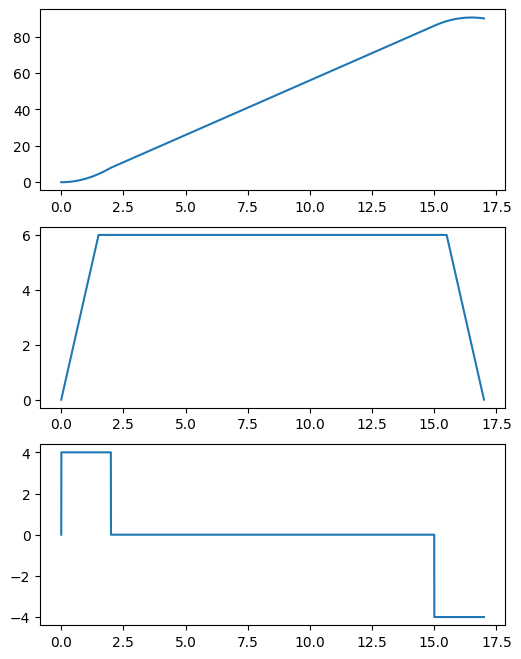

In [ ]:
from matplotlib.pyplot import *

class TrapezoidalTrajectoryPlanner:
    def __init__(self):
        pass

    def plan_trajectory(self, t_params, q_params):
        q0, qf, dq_max, ddq_max = q_params
        t0, tau, T, tf = t_params
        t = np.linspace(t0, tf, int(3e3))

        dq_max = min(dq_max, (qf - q0) / T)
        q, dq, ddq = [], [], []
        dq_i, ddq_i = 0, 0

        for i in t:
            t_i = i
            q_i = q0

            if 0 < t_i <= tau:

                q_i = q0 + 1/2*ddq_max*(t_i-t0)**2
                q02 = q_i
                dq_i = min(ddq_max * t_i, dq_max)
                dq02 = dq_i
                ddq_i = ddq_max

            elif tau < t_i and t_i <= T:

                q_i = q02 + dq02*(t_i-tau)
                q_03 = q_i
                dq_i = dq_max
                dq03 = dq_i
                ddq_i = 0


            elif t_i > T:

                q_i = q_03 + dq03*(t_i-T) - 1/2*ddq_max*(t_i-T)**2
                dq_i = min(ddq_max*(tf-t_i), dq_max)
                ddq_i = -ddq_max

            q.append(q_i)
            dq.append(dq_i)
            ddq.append(ddq_i)

        return t, q, dq, ddq


planner = TrapezoidalTrajectoryPlanner()

t_params = [0, 2.0, 15.0, 17.0]
q_params = [0,90,8,4]
t, q, dq, ddq = planner.plan_trajectory(t_params, q_params)

figure(figsize=(6,8))
subplot(311)
plot(t, q)

subplot(312)
plot(t, dq)

subplot(313)
plot(t, ddq)

show()

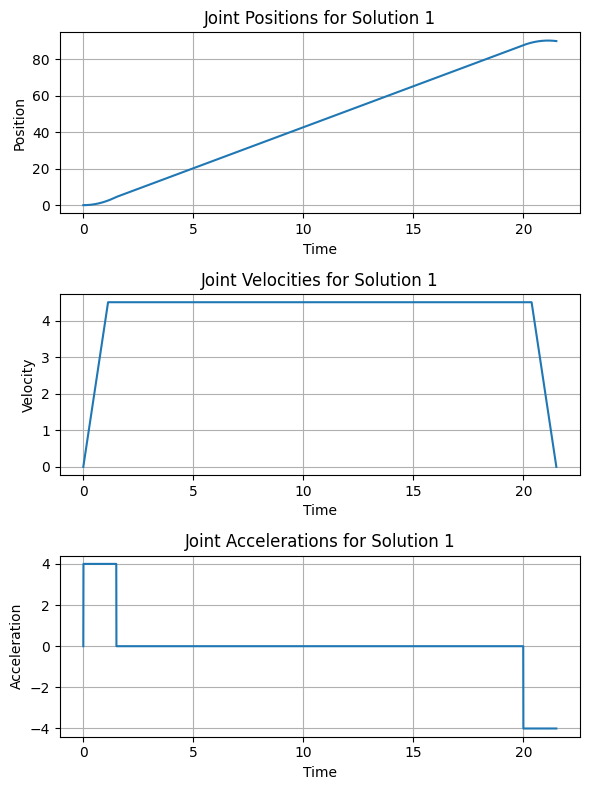

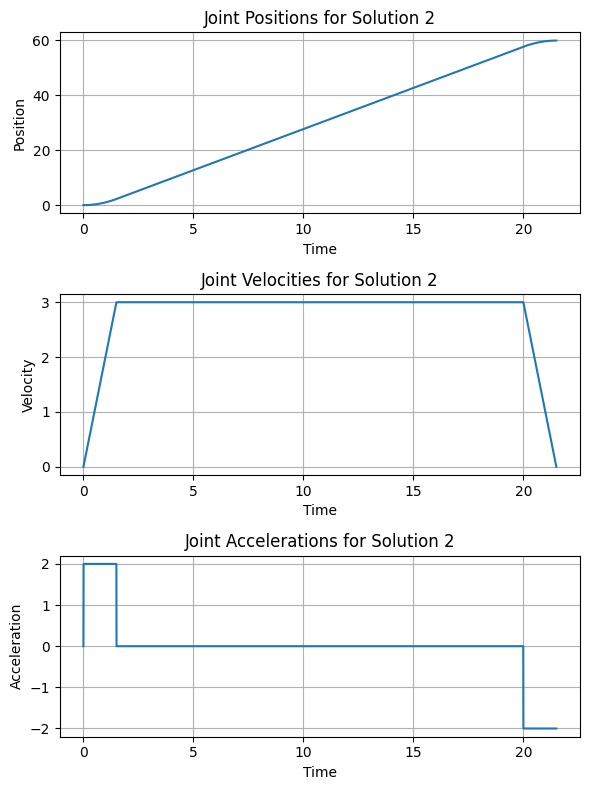

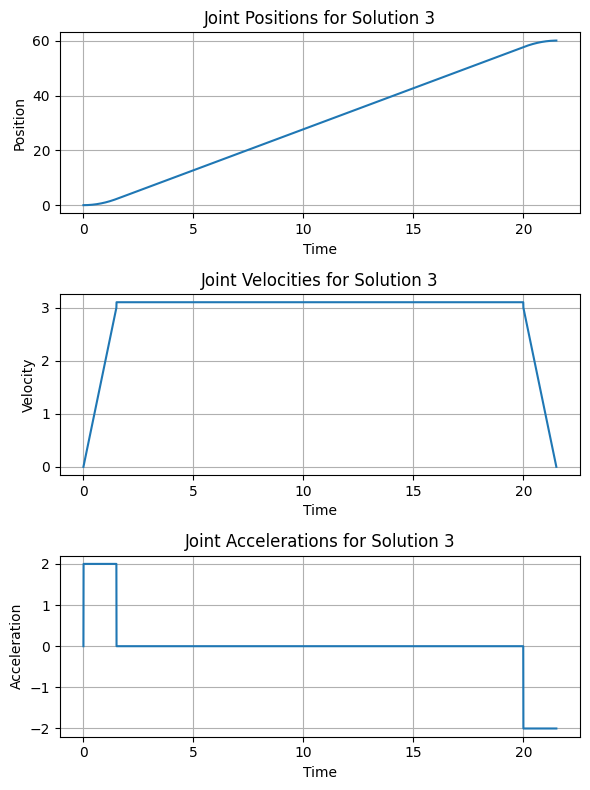

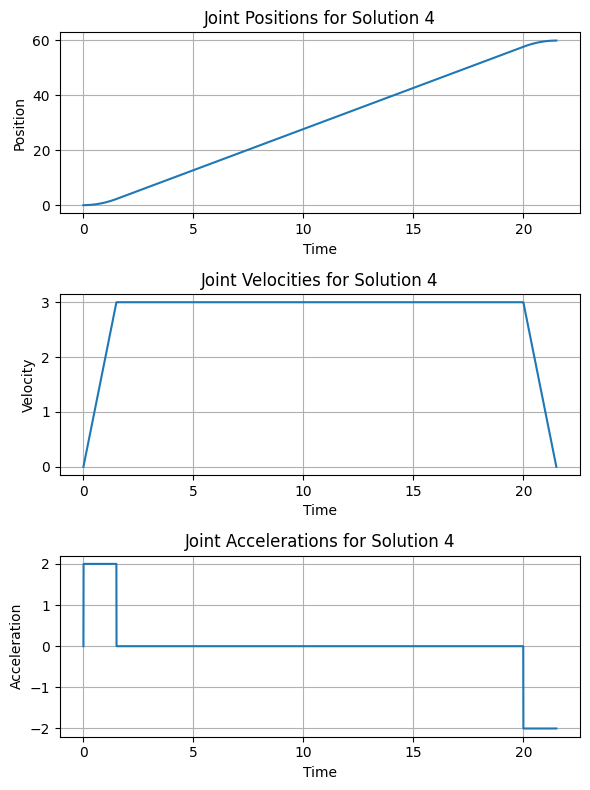

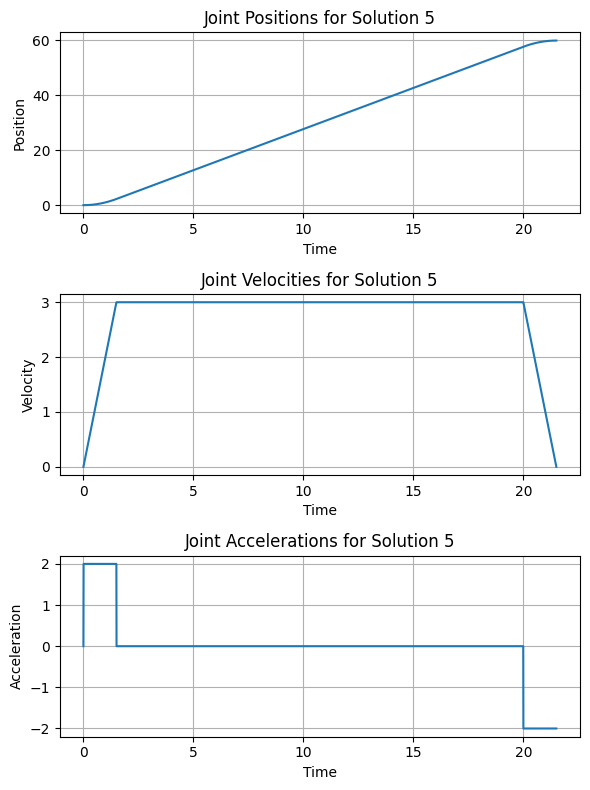

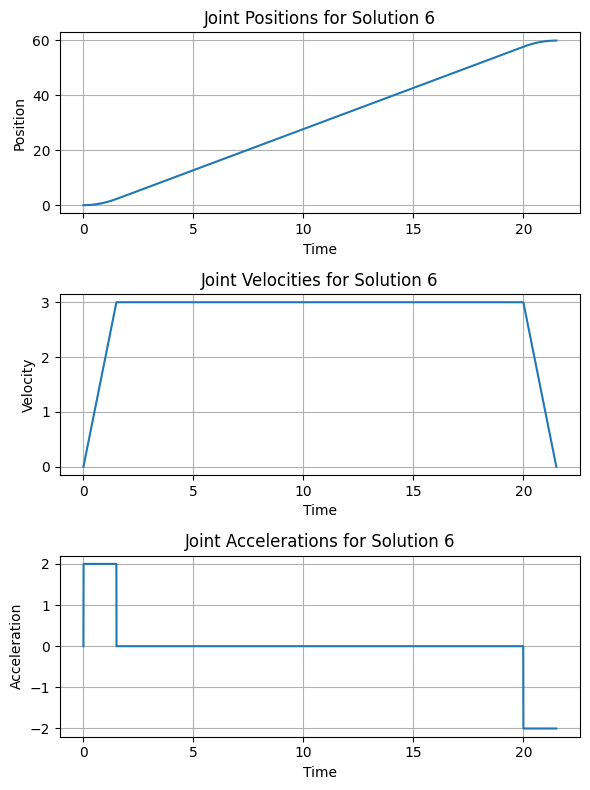

In [ ]:
import  matplotlib.pyplot as plt

def plan_sync_trajectory(t_params_sync, q_params_list):
    sync_traj_joints = []
    planner = TrapezoidalTrajectoryPlanner()
    for q_params in q_params_list:
      # print("q_params", q_params)
      sync_traj = planner.plan_trajectory(t_params_sync, q_params)
      sync_traj_joints.append(sync_traj)

    return sync_traj_joints

def plot_trajectory(solution):
    for i in range(len(solution)):
        t, q, dq, ddq = solution[i]

        # Create a new figure for each solution
        plt.figure(figsize=(6, 8))

        # Plot joint positions
        plt.subplot(311)
        plt.plot(t, q)
        plt.title(f"Joint Positions for Solution {i+1}")
        plt.xlabel("Time")
        plt.ylabel("Position")
        plt.grid(True)

        # Plot joint velocities
        plt.subplot(312)
        plt.plot(t, dq)
        plt.title(f"Joint Velocities for Solution {i+1}")
        plt.xlabel("Time")
        plt.ylabel("Velocity")
        plt.grid(True)

        # Plot joint accelerations
        plt.subplot(313)
        plt.plot(t, ddq)
        plt.title(f"Joint Accelerations for Solution {i+1}")
        plt.xlabel("Time")
        plt.ylabel("Acceleration")
        plt.grid(True)

        # Show the plots
        plt.tight_layout()
        plt.show()

# Example usage
j1 = [0,90,8,4]
j2 = [0,60,4,2]
j3 = [0,62,4,2]
j4 = [0,60,4,2]
j5 = [0,60,3,2]
j6 = [0,60,5,2]


j_list = [j1, j2, j3, j4, j5, j6]
calc_traj = TrajectoryTimeCalculator()
time_params = [calc_traj.calc_traj_time(j) for j in j_list]


synchronizer = TimeSynchronizer()
t_params_sync = synchronizer.sync_time(time_params)
solution = plan_sync_trajectory(t_params_sync, j_list)

plot_trajectory(solution)


# # Exxample of usage
# j1 = [0,90,8,4]
# j2 = [0,60,4,2]
# j3 = [0,62,4,2]
# j4 = [0,60,4,2]
# j5 = [0,60,3,2]
# j6 = [0,60,5,2]

# # Params [q0,qf,dq_max,ddq_max]
# q_params_list = [j1, j2, j3, j4, j5, j6]
# solution = plan_sync_trajectory(t_params_sync, q_params_list)

# plot_trajectory(solution)

# **Some tests**

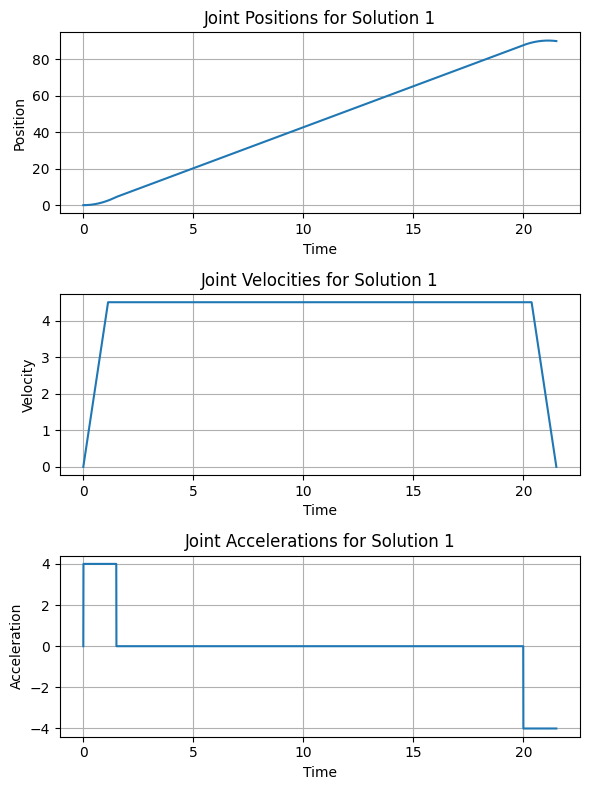

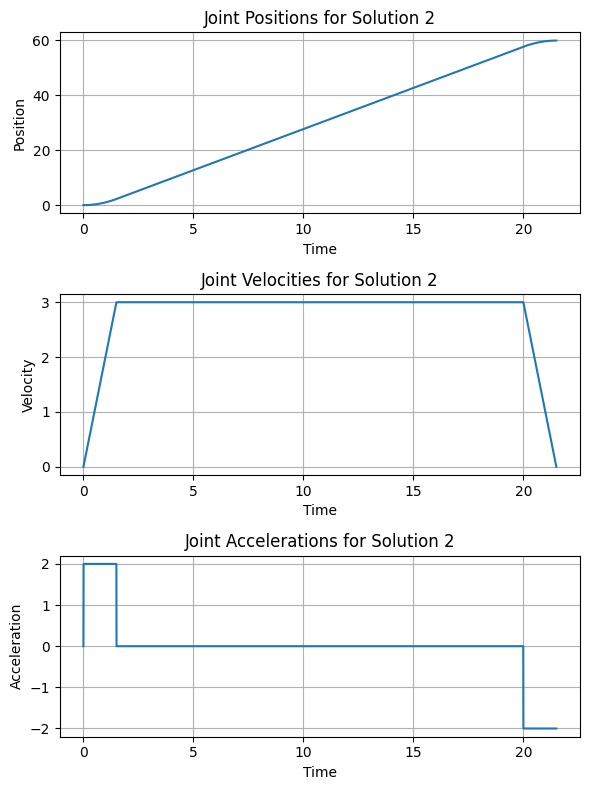

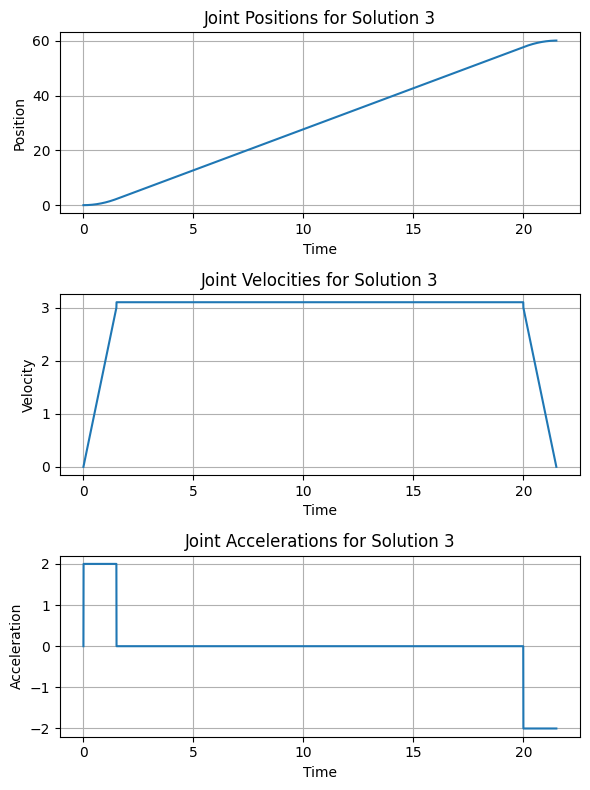

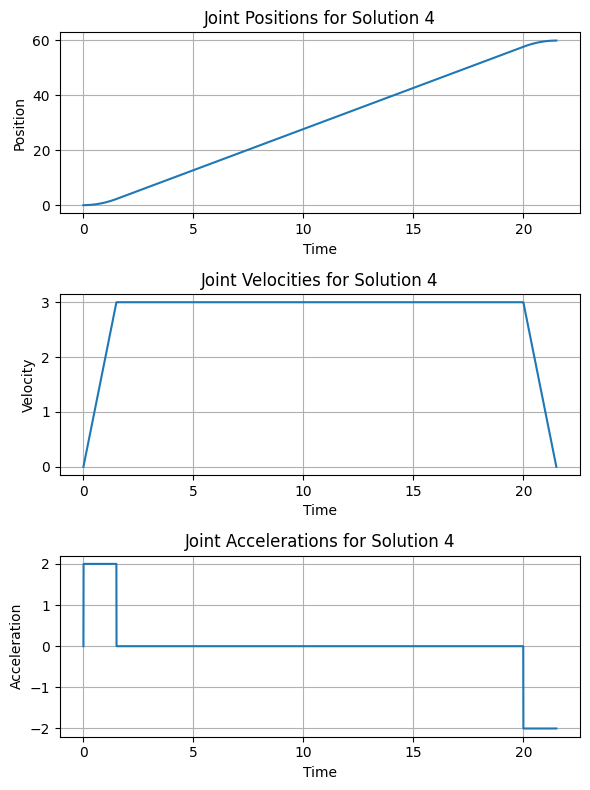

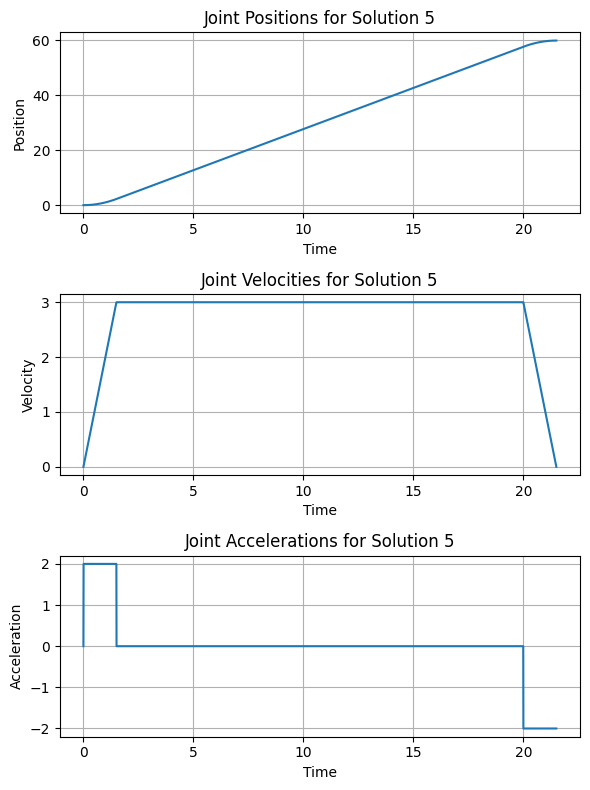

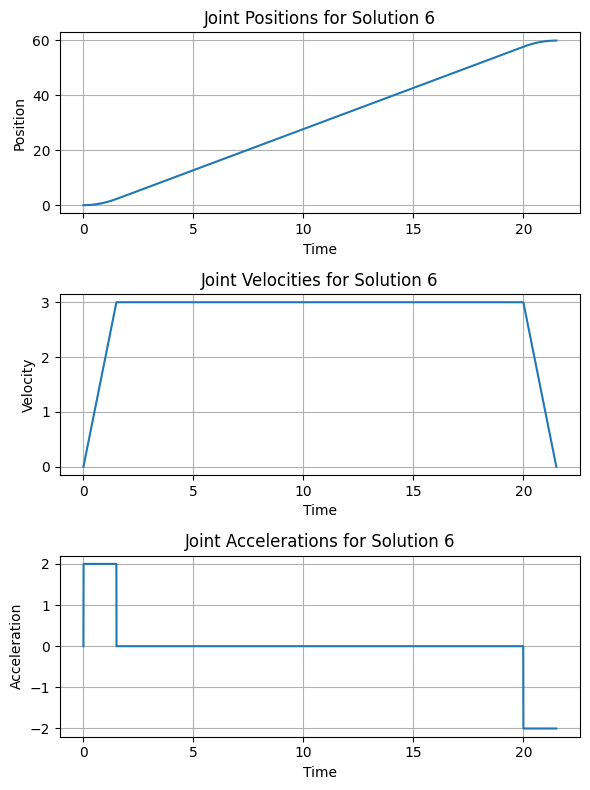

In [ ]:
from matplotlib.pyplot import *


class TrajectoryTypeChecker:
    def __init__(self):
        pass

    def check_traj_type(self, q_params, t0=0):
        q0, qf, dq_max, ddq_max = q_params
        delta_q = qf - q0

        if np.sqrt(delta_q*ddq_max) <= dq_max:
            return "Triangular"
        else:
            return "Trapezoidal"

class TrajectoryTimeCalculator:
    def __init__(self):
        self.checker = TrajectoryTypeChecker()

    def calc_traj_time(self, q_params, t0=0):
        q0, qf, dq_max, ddq_max = q_params
        delta_q = qf - q0

        if self.checker.check_traj_type(q_params) == "Triangular":
            tau = delta_q / dq_max
            T = tau
            tf = 2 * tau
        else:
            T = delta_q / dq_max
            tau = dq_max / ddq_max
            tf = T + tau

        return 0, tau, T, tf

class TimeSynchronizer:
    def __init__(self):
        pass

    def sync_time(self, t_params_list):
        t0_sync, t_total, t_dwel = 0, 0, 0

        for t_params in t_params_list:
            t0, tau, T, tf = t_params
            t0_sync = max(t0_sync, t0)
            t_total = max(t_total, tf - t0)
            t_dwel = max(t_dwel, T - tau)

        t0_sync, tf_sync = t0_sync, t0_sync + t_total
        tau_sync = t0 + (t_total - t_dwel) / 2
        T_sync = tau_sync + t_dwel

        return t0_sync, tau_sync, T_sync, tf_sync


class TrapezoidalTrajectoryPlanner:
    def __init__(self):
        pass

    def plan_trajectory(self, t_params, q_params):
        q0, qf, dq_max, ddq_max = q_params
        t0, tau, T, tf = t_params
        t = np.linspace(t0, tf, int(3e3))

        dq_max = min(dq_max, (qf - q0) / T)
        q, dq, ddq = [], [], []
        dq_i, ddq_i = 0, 0

        for i in t:
            t_i = i
            q_i = q0

            if 0 < t_i <= tau:

                q_i = q0 + 1/2*ddq_max*(t_i-t0)**2
                q02 = q_i
                dq_i = min(ddq_max * t_i, dq_max)
                dq02 = dq_i
                ddq_i = ddq_max

            elif tau < t_i and t_i <= T:

                q_i = q02 + dq02*(t_i-tau)
                q_03 = q_i
                dq_i = dq_max
                dq03 = dq_i
                ddq_i = 0


            elif t_i > T:

                q_i = q_03 + dq03*(t_i-T) - 1/2*ddq_max*(t_i-T)**2
                dq_i = min(ddq_max*(tf-t_i), dq_max)
                ddq_i = -ddq_max

            q.append(q_i)
            dq.append(dq_i)
            ddq.append(ddq_i)

        return t, q, dq, ddq


def plan_sync_trajectory(q_params_list):

    calc_traj = TrajectoryTimeCalculator()
    time_params = [calc_traj.calc_traj_time(j) for j in q_params_list]

    def time_synchronize(t_params):
      synchronizer = TimeSynchronizer()
      t_params_sync = synchronizer.sync_time(t_params)
      return t_params_sync

    t_params_sync = time_synchronize(time_params)

    sync_traj_joints = []
    planner = TrapezoidalTrajectoryPlanner()
    for q_params in q_params_list:
      # print("q_params", q_params)
      sync_traj = planner.plan_trajectory(t_params_sync, q_params)
      sync_traj_joints.append(sync_traj)

    return sync_traj_joints


def plot_trajectory(solution):
    for i in range(len(solution)):
        t, q, dq, ddq = solution[i]

        # Create a new figure for each solution
        plt.figure(figsize=(6, 8))

        # Plot joint positions
        plt.subplot(311)
        plt.plot(t, q)
        plt.title(f"Joint Positions for Solution {i+1}")
        plt.xlabel("Time")
        plt.ylabel("Position")
        plt.grid(True)

        # Plot joint velocities
        plt.subplot(312)
        plt.plot(t, dq)
        plt.title(f"Joint Velocities for Solution {i+1}")
        plt.xlabel("Time")
        plt.ylabel("Velocity")
        plt.grid(True)

        # Plot joint accelerations
        plt.subplot(313)
        plt.plot(t, ddq)
        plt.title(f"Joint Accelerations for Solution {i+1}")
        plt.xlabel("Time")
        plt.ylabel("Acceleration")
        plt.grid(True)

        # Show the plots
        plt.tight_layout()
        plt.show()

# Example usage
j1 = [0,90,8,4]
j2 = [0,60,4,2]
j3 = [0,62,4,2]
j4 = [0,60,4,2]
j5 = [0,60,3,2]
j6 = [0,60,5,2]


j_list = [j1, j2, j3, j4, j5, j6]

solution = plan_sync_trajectory(j_list)

plot_trajectory(solution)

In [ ]:
import matplotlib.pyplot as plt


# rewrite to sync params

def plan_sync_trajectory(t_params_sync, q_params_list):

  sync_traj_joints = []
  planner = TrapezoidalTrajectoryPlanner()
  for q_params in q_params_list:
    sync_traj = planner.plan_trajectory(t_params_sync, q_params)
    sync_traj_joints.append(sync_traj)

  return sync_traj_joints

q_params_list = j_list
solution = plan_sync_trajectory(t_params_sync, q_params_list)



def plot_trajectory(t, q, dq, ddq, title):
    plt.figure(figsize=(6, 8))
    plt.subplot(311)
    plt.plot(t, q)
    plt.title(f"Joint Positions for {title}")
    plt.xlabel("Time")
    plt.ylabel("Position")
    plt.grid(True)

    plt.subplot(312)
    plt.plot(t, dq)
    plt.title(f"Joint Velocities for {title}")
    plt.xlabel("Time")
    plt.ylabel("Velocity")
    plt.grid(True)

    plt.subplot(313)
    plt.plot(t, ddq)
    plt.title(f"Joint Accelerations for {title}")
    plt.xlabel("Time")
    plt.ylabel("Acceleration")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plotting synchronized trajectories
for idx, joint in enumerate(q_params_list):
    t, q, dq, ddq = plan_sync_trajectory(t_params_sync, joint)
    plot_trajectory(t, q, dq, ddq, f"Solution {idx+1}")


# for i in range(len(solution)):
#     t, q, dq, ddq = solution[i]

#     # Create a new figure for each solution
#     plt.figure(figsize=(6, 8))

#     # Plot joint positions
#     plt.subplot(311)
#     plt.plot(t, q)
#     plt.title(f"Joint Positions for Solution {i+1}")
#     plt.xlabel("Time")
#     plt.ylabel("Position")
#     plt.grid(True)

#     # Plot joint velocities
#     plt.subplot(312)
#     plt.plot(t, dq)
#     plt.title(f"Joint Velocities for Solution {i+1}")
#     plt.xlabel("Time")
#     plt.ylabel("Velocity")
#     plt.grid(True)

#     # Plot joint accelerations
#     plt.subplot(313)
#     plt.plot(t, ddq)
#     plt.title(f"Joint Accelerations for Solution {i+1}")
#     plt.xlabel("Time")
#     plt.ylabel("Acceleration")
#     plt.grid(True)

#     # Show the plots
#     plt.tight_layout()
#     plt.show()


TypeError: cannot unpack non-iterable int object

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class TrapezoidalTrajectoryPlanner:
    def __init__(self):
        pass

    def plan_trajectory(self, t_params, q_params):
        q0, qf, dq_max, ddq_max = q_params
        t0, tau, T, tf = t_params
        t = np.linspace(t0, tf, int(3e3))

        dq_max = min(dq_max, (qf - q0) / T)
        q, dq, ddq = [], [], []

        dq_i, ddq_i = 0, 0
        for ti in t:
            if 0 < ti <= tau:
                q_i = q0 + 0.5 * ddq_max * (ti - t0) ** 2
                dq_i = min(ddq_max * ti, dq_max)
                ddq_i = ddq_max
            elif tau < ti <= T:
                q_i = q0 + dq_i * (ti - tau)
                dq_i = dq_max
                ddq_i = 0
            elif ti > T:
                q_i = q0 + dq_i * (ti - T) - 0.5 * ddq_max * (ti - T) ** 2
                dq_i = min(ddq_max * (tf - ti), dq_max)
                ddq_i = -ddq_max

            q.append(q_i)
            dq.append(dq_i)
            ddq.append(ddq_i)

        return t, q, dq, ddq

class TimeSynchronizer:
    def __init__(self):
        pass

    def sync_time(self, t_params_list):
        t0_sync, t_total, t_dwel = 0, 0, 0

        for t_params in t_params_list:
            t0, tau, T, tf = t_params
            t0_sync = max(t0_sync, t0)
            t_total = max(t_total, tf - t0)
            t_dwel = max(t_dwel, T - tau)

        t0_sync, tf_sync = t0_sync, t0_sync + t_total
        tau_sync, T_sync = t0 + (t_total - t_dwel) / 2, tau_sync + t_dwel

        return t0_sync, tau_sync, T_sync, tf_sync

# Example usage:
planner = TrapezoidalTrajectoryPlanner()
synchronizer = TimeSynchronizer()

joints = [
    [0, 90, 8, 4],
    [0, 60, 4, 2],
    [0, 62, 4, 2],
    [0, 60, 4, 2],
    [0, 60, 3, 2],
    [0, 60, 5, 2]
]

time_params = [planner.plan_trajectory(joint[:4], joint[:4]) for joint in joints]
t_params_sync = synchronizer.sync_time(time_params)

# Plotting synchronized trajectories
for idx, joint in enumerate(joints):
    t, q, dq, ddq = planner.plan_trajectory(t_params_sync, joint)
    plt.figure(figsize=(6, 8))
    plt.subplot(311)
    plt.plot(t, q)
    plt.title(f"Joint Positions for Solution {idx+1}")
    plt.xlabel("Time")
    plt.ylabel("Position")
    plt.grid(True)

    plt.subplot(312)
    plt.plot(t, dq)
    plt.title(f"Joint Velocities for Solution {idx+1}")
    plt.xlabel("Time")
    plt.ylabel("Velocity")
    plt.grid(True)

    plt.subplot(313)
    plt.plot(t, ddq)
    plt.title(f"Joint Accelerations for Solution {idx+1}")
    plt.xlabel("Time")
    plt.ylabel("Acceleration")
    plt.grid(True)

    plt.tight_layout()
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class TrapezoidalTrajectoryPlanner:
    def __init__(self):
        pass

    def plan_trajectory(self, t_params, q_params):
        q0, qf, dq_max, ddq_max = q_params
        t0, tau, T, tf = t_params
        t = np.linspace(t0, tf, int(3e3))

        dq_max = min(dq_max, (qf - q0) / T)
        q = []
        dq = []
        ddq = []

        dq_i = 0
        ddq_i = 0
        for ti in t:
            if 0 < ti <= tau:
                q_i = q0 + 0.5 * ddq_max * (ti - t0) ** 2
                dq_i = min(ddq_max * ti, dq_max)
                ddq_i = ddq_max

            elif tau < ti <= T:
                q_i = q0 + dq_i * (ti - tau)
                dq_i = dq_max
                ddq_i = 0

            elif ti > T:
                q_i = q0 + dq_i * (ti - T) - 0.5 * ddq_max * (ti - T) ** 2
                dq_i = min(ddq_max * (tf - ti), dq_max)
                ddq_i = -ddq_max

            q.append(q_i)
            dq.append(dq_i)
            ddq.append(ddq_i)

        return t, q, dq, ddq

    def sync_time(self, t_params_list):
        t0_sync, t_total, t_dwel = 0, 0, 0

        for t_params in t_params_list:
            t0, tau, T, tf = t_params

            t0_sync = max(t0_sync, t0)
            t_total = max(t_total, tf - t0)
            t_dwel = max(t_dwel, T - tau)

        t0_sync = t0_sync
        tf_sync = t0_sync + t_total
        tau_sync = t0 + (t_total - t_dwel) / 2
        T_sync = tau_sync + t_dwel

        return t0_sync, tau_sync, T_sync, tf_sync

# Example usage:
planner = TrapezoidalTrajectoryPlanner()

j1 = [0, 90, 8, 4]
j2 = [0, 60, 4, 2]
j3 = [0, 62, 4, 2]
j4 = [0, 60, 4, 2]
j5 = [0, 60, 3, 2]
j6 = [0, 60, 5, 2]
j_list = [j1, j2, j3, j4, j5, j6]

time_params = [planner.plan_trajectory(*trajectory_params) for trajectory_params in j_list]
t_params_sync = planner.sync_time(time_params)

print("Synchronized time parameters:", t_params_sync)


TypeError: TrapezoidalTrajectoryPlanner.plan_trajectory() takes 3 positional arguments but 5 were given

In [ ]:
    # def trajectory_time(q_params, t0 = 0):
    #   q0, qf, dq_max, ddq_max = q_params
    #   delta_q = qf - q0

    #   if np.sqrt(delta_q*ddq_max) <= dq_max:
    #     # Triangular profile
    #     print("Triangular")
    #     tau = delta_q / dq_max
    #     T = tau
    #     tf = 2*tau

    #   else:
    #     # Trapezoidal profile
    #     print("Trapezoidal")
    #     T = delta_q / dq_max
    #     tau = dq_max / ddq_max
    #     tf = T + tau

    #   time_params = t0, tau, T, tf
    #   return time_params

    # _,t1,T,tf = trajectory_time([10,45,8,4])
    # print( 'rise time: {}, dwel time: {}, drop time: {}, total time: {}'.format(t1, T-t1, tf-T, tf))




# class TrajectoryTypeChecker:
#     def __init__(self):
#         pass

#     def check_trajectory(self, q_params, t0=0):
#         q0, qf, dq_max, ddq_max = q_params
#         delta_q = qf - q0
#         tau_triangular = np.sqrt(delta_q / ddq_max)
#         T_trapezoidal = delta_q / dq_max
#         tau_trapezoidal = dq_max / ddq_max

#         if tau_triangular <= T_trapezoidal:
#             return "Triangular"
#         else:
#             return "Trapezoidal"

class TrajectoryTypeChecker:
    def __init__(self):
        pass

    def check_trajectory(self, q_params, t0=0):
        q0, qf, dq_max, ddq_max = q_params
        delta_q = qf - q0

        if np.sqrt(delta_q*ddq_max) <= dq_max:
            return "Triangular"
        else:
            return "Trapezoidal"

class TrajectoryTimeCalculator:
    def __init__(self):
        self.checker = TrajectoryTypeChecker()

    def trajectory_time(self, q_params, t0=0):
        q0, qf, dq_max, ddq_max = q_params
        delta_q = qf - q0

        if self.checker.check_trajectory(q_params) == "Triangular":
            tau = delta_q / dq_max
            T = tau
            tf = 2 * tau
        else:
            T = delta_q / dq_max
            tau = dq_max / ddq_max
            tf = T + tau

        return 0, tau, T, tf

# Example usage:
checker = TrajectoryTimeCalculator()
params_triangular = [0, 5, 2, 1]  # Triangular trajectory
params_trapezoidal = [0, 10, 2, 1]  # Trapezoidal trajectory

print("Trajectory type for params_triangular:", checker.checker.check_trajectory(params_triangular))
print("Trajectory type for params_trapezoidal:", checker.checker.check_trajectory(params_trapezoidal))

print("Time parameters for params_triangular:", checker.trajectory_time(params_triangular))
print("Time parameters for params_trapezoidal:", checker.trajectory_time(params_trapezoidal))


IndentationError: expected an indented block after class definition on line 44 (<ipython-input-14-92d87ad91037>, line 45)

In [ ]:

q = sp.symbols('theta1 theta2 theta3 theta4 theta5 theta6')

def calc_M_num(M, q_num):


  M_num = np.zeros((6, 6))
  for i in range(6):
    for j in range(6):
      M_num[i, j]  = M[i, j].subs([(q[i], q_num[i]) for i in range(6)]).evalf()
  return M_num

q_values = [np.pi/2, -np.pi/12, -np.pi/12, np.pi/4, np.pi/6, 0]

calc_M_num(mass_matrix, q_values)

array([[ 3.47889606e+01,  1.04577703e+00,  8.62764329e-01,
        -2.99080185e+00, -4.93809167e+00, -7.92665525e-05],
       [ 1.04577703e+00,  3.94428621e+01,  2.75406368e+01,
        -2.91372285e+00,  5.77782346e+00,  2.20970869e-04],
       [ 8.62764329e-01,  2.75406368e+01,  1.98890366e+01,
        -2.23071014e+00,  4.33599171e+00,  2.20970869e-04],
       [-2.99080185e+00, -2.91372285e+00, -2.23071014e+00,
         7.51875000e-01,  8.67361738e-17,  5.41265877e-04],
       [-4.93809167e+00,  5.77782346e+00,  4.33599171e+00,
         7.70899661e-17,  2.66791667e+00,  6.12329750e-18],
       [-7.92665525e-05,  2.20970869e-04,  2.20970869e-04,
         5.41265877e-04,  7.03376159e-18,  6.25000000e-04]])

In [ ]:
def Mnum(qVal):
  ret = np.zeros((6, 6))
  for i in range(6):
    for j in range(6):
      ret[i, j] = M[i, j].subs([(q[i], qVal[i]) for i in range(6)]).evalf()
  return ret

Mnum()

In [ ]:
q = sp.symbols('theta1 theta2 theta3 theta4 theta5 theta6')
# # dq = sp.symbols('dtheta1 dtheta2 dtheta3 dtheta4 dtheta5 dtheta6')
q_values = [np.pi/2, -np.pi/12, -np.pi/12, np.pi/4, np.pi/6, 0]
subs_dict = {qi: qv for qi, qv in zip(q, q_values)}

# mass_matrix_num = mass_matrix.subs(subs_dict).evalf()
# mass_matrix_num

mass_matrix = MassMatrix(manipulator, coms_matrices_symb).compute_symb()

# Convert symbolic matrix to a NumPy array before substitution
mass_matrix_num = np.array([[mass_matrix[i, j].subs(subs_dict).evalf() for j in range(6)] for i in range(6)])
mass_matrix_num


array([[34.7889605506065, 1.04577703077217, 0.862764328879951,
        -2.99080185447036, -4.93809167285193, -7.92665525277065e-5],
       [1.04577703077217, 39.4428620978133, 27.5406368307111,
        -2.91372284519304, 5.77782345641853, 0.000220970869120801],
       [0.862764328879951, 27.5406368307111, 19.8890365636088,
        -2.23071014330082, 4.33599170942379, 0.000220970869120801],
       [-2.99080185447036, -2.91372284519304, -2.23071014330082,
        0.751875000000000, 8.67361737988404e-17, 0.000541265877365275],
       [-4.93809167285193, 5.77782345641853, 4.33599170942379,
        7.70899660569247e-17, 2.66791666666667, 6.12329749572837e-18],
       [-7.92665525277068e-5, 0.000220970869120800, 0.000220970869120800,
        0.000541265877365275, 7.03376159399971e-18, 0.000625000000000000]],
      dtype=object)

In [ ]:
def Cnum(qVal, dqVal):
  ret = np.zeros((6, 6))
  for i in range(6):
    for j in range(6):
      ret[i, j] = cor_matrix[i, j].subs([(q[i], qVal[i]) for i in range(6)] + [(dq[i], dqVal[i]) for i in range(6)]).evalf()
  return ret

q_values = [np.pi/2, -np.pi/12, -np.pi/12, np.pi/4, np.pi/6, 0]
dq_values = [np.pi/24, -np.pi/24, -np.pi/24, np.pi/24, np.pi/24, -np.pi/24]

cor_matrix_num = Cnum(q_values, dq_values)
cor_matrix_num

array([[-3.27560919e+00,  2.30758294e+00,  1.84025653e+00,
        -5.53925081e-01, -2.81158117e-01, -5.64263388e-05],
       [-1.37166491e+00, -6.57006177e-01, -8.29556753e-01,
        -7.90481809e-01,  1.97049811e-01,  1.60144039e-06],
       [-1.05919449e+00, -2.03002862e-01, -3.75553439e-01,
        -6.18088575e-01,  1.71245988e-01,  1.60144039e-06],
       [ 3.51131523e-01, -1.65874186e-01, -1.17961572e-01,
         1.51149947e-01,  5.55598742e-03,  2.09968426e-05],
       [ 4.93561838e-01, -1.05038549e+00, -9.23946098e-01,
        -5.55598742e-03, -2.00759397e-17,  3.86323770e-05],
       [-5.64263388e-05,  7.74231815e-05,  7.74231815e-05,
        -6.19029970e-05, -3.86323770e-05,  1.41921733e-20]])

In [ ]:
def gnum(qVal):
  ret = np.zeros(6)
  for i in range(6):
    ret[i] = grav_matrix[i].subs([(q[i], qVal[i]) for i in range(6)]).evalf()
  return ret

gnum(q_values)

array([   0.        , -111.79840963,  -69.15761403,    6.00737359,
        -15.31007629,    0.        ])

In [ ]:
class DynamicsNumericalSolver:
  def __init__(self, q, dq):
    self.q = q
    self.dq = dq
    self.q_sym = sp.symbols('theta1 theta2 theta3 theta4 theta5 theta6')
    self.dq_sym = sp.symbols('dtheta1 dtheta2 dtheta3 dtheta4 dtheta5 dtheta6')


  def calc_M_num(self, M):
    q_num = self.q

    M_num = np.zeros((6, 6))
    for i in range(6):
      for j in range(6):
        M_num[i, j]  = M[i, j].subs([(self.q_sym[i], q_num[i]) for i in range(6)]).evalf()
    return M_num

  def calc_C_num(self, C):
    q_num = self.q
    dq_num = self.dq
    C_num = np.zeros((6, 6))
    for i in range(6):
      for j in range(6):
        C_num[i, j] = C[i, j].subs([(self.q_sym[i], q_num[i]) for i in range(6)] + [(self.dq_sym[i], dq_num[i]) for i in range(6)]).evalf()
    return C_num

  def calc_G_num(self, G):
    q_num = self.q

    G_num = np.zeros(6)
    for i in range(6):
      G_num[i] = G[i].subs([(self.q_sym[i], q_num[i]) for i in range(6)]).evalf()
    return G_num

  # def compute_dynamics_eq(self):

q = [np.pi/2, -np.pi/12, -np.pi/12, np.pi/4, np.pi/6, 0]
dq = [np.pi/24, -np.pi/24, -np.pi/24, np.pi/24, np.pi/24, -np.pi/24]
sol = DynamicsNumericalSolver(q, dq)

mm = sol.calc_M_num(mass_matrix)
# cm = sol.calc_C_num(cor_matrix)
# gm = sol.calc_G_num(grav_matrix)

mm

array([[ 3.47889606e+01,  1.04577703e+00,  8.62764329e-01,
        -2.99080185e+00, -4.93809167e+00, -7.92665525e-05],
       [ 1.04577703e+00,  3.94428621e+01,  2.75406368e+01,
        -2.91372285e+00,  5.77782346e+00,  2.20970869e-04],
       [ 8.62764329e-01,  2.75406368e+01,  1.98890366e+01,
        -2.23071014e+00,  4.33599171e+00,  2.20970869e-04],
       [-2.99080185e+00, -2.91372285e+00, -2.23071014e+00,
         7.51875000e-01,  8.67361738e-17,  5.41265877e-04],
       [-4.93809167e+00,  5.77782346e+00,  4.33599171e+00,
         7.70899661e-17,  2.66791667e+00,  6.12329750e-18],
       [-7.92665525e-05,  2.20970869e-04,  2.20970869e-04,
         5.41265877e-04,  7.03376159e-18,  6.25000000e-04]])

#** Trials**